## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score


## Importing the dataset

In [2]:
dataset = pd.read_csv('Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
y = y.reshape(len(y),1)

## Splitting the dataset into the Training set and Test set

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Feature Scaling

In [5]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_sc = sc_X.fit_transform(X_train)
y_train_sc = sc_y.fit_transform(y_train)

## Training the model

### Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression

LLR = LinearRegression()
LLR = LLR.fit(X_train, y_train)

### Polynomial regression

In [9]:
from sklearn.preprocessing import PolynomialFeatures

ploy = PolynomialFeatures(degree=4)
x_poly = ploy.fit_transform(X_train)
ploy_LR = LinearRegression()
ploy_LR = ploy_LR.fit(x_poly, y_train)

### Support Vector Regression(SVR)

In [10]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf')
svr.fit(X_train_sc, y_train_sc)

C:\Users\sathish\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

### Decision Tree Regression

In [11]:
from sklearn.tree import DecisionTreeRegressor

DR = DecisionTreeRegressor(random_state=42)
DR.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

### Random Forest Regression

In [12]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(n_estimators=10, random_state=42)
RF.fit(X_train, y_train)

C:\Users\sathish\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=10, random_state=42)

## Predicting the test data

In [14]:
LR_pred = LLR.predict(X_test)
ploy_pred = ploy_LR.predict(ploy.transform(X_test))
svr_pred = sc_y.inverse_transform(svr.predict(sc_X.transform(X_test)).reshape(-1,1))
DR_pred = DR.predict(X_test)
RF_pred = RF.predict(X_test)

In [27]:
y_test = np.array(y_test).flatten()
LR_pred = np.array(LR_pred).flatten()
ploy_pred = np.array(ploy_pred).flatten()
svr_pred = np.array(svr_pred).flatten()
DR_pred = np.array(DR_pred).flatten()
RF_pred = np.array(RF_pred).flatten()



predictions_df = pd.DataFrame({'y_test':y_test, 
    'LR_pred': LR_pred,
    'ploy_pred': ploy_pred,
    'svr_pred': svr_pred,
    'DR_pred': DR_pred,
    'RF_pred': RF_pred
})

# Round off to two decimal places
predictions_df = predictions_df.round(2)

In [28]:
predictions_df

,y_test,LR_pred,ploy_pred,svr_pred,DR_pred,RF_pred
0,431.23,431.43,433.94,434.05,429.06,434.88
1,460.01,458.56,457.90,457.94,459.59,457.26
2,461.14,462.75,460.52,461.03,460.06,463.76
3,445.90,448.60,447.57,448.63,451.64,446.93
4,451.29,457.87,457.22,457.83,459.14,460.18
...,...,...,...,...,...,...
1909,460.29,463.63,463.47,462.64,460.45,460.25
1910,452.42,457.04,455.98,455.35,454.88,453.94
1911,473.26,469.52,469.53,470.60,470.31,470.80
1912,438.00,442.42,438.27,439.42,437.76,438.40


C:\Users\sathish\AppData\Local\Temp\ipykernel_26288\2090373876.py:25: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\sathish\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


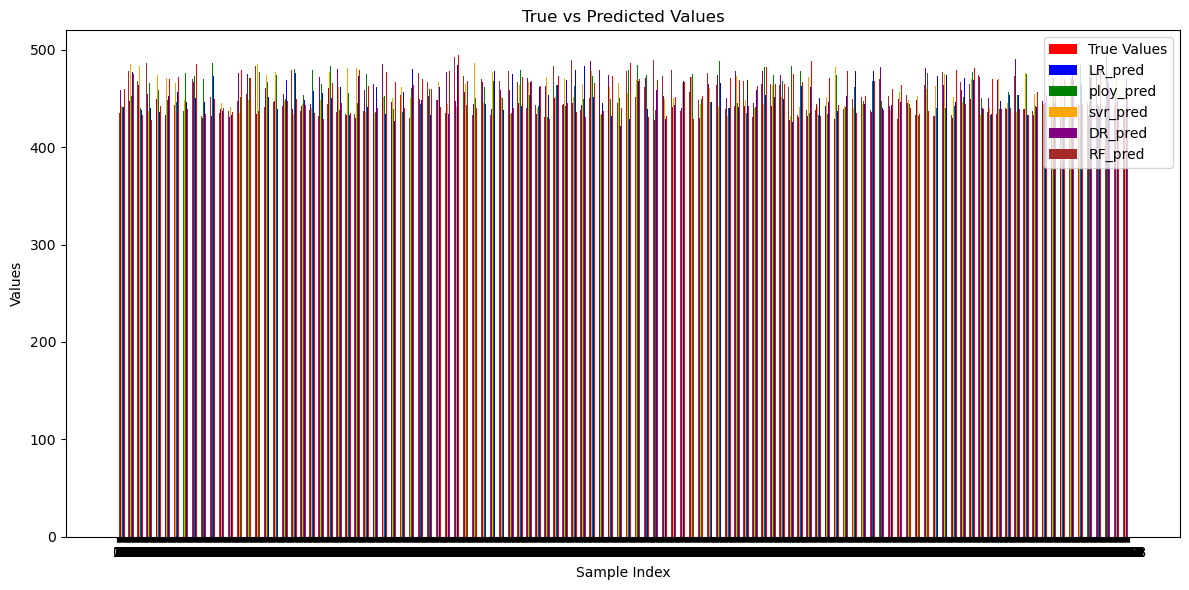

In [33]:
num_samples = len(predictions_df)

# Creating index for the bars
index = np.arange(num_samples)

# Width of the bars
bar_width = 0.1

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(index, predictions_df['y_test'], bar_width, label='True Values', color='red')

# Predictions
for i, (col, color) in enumerate(zip(predictions_df.columns[1:], ['blue', 'green', 'orange', 'purple', 'brown'])):
    plt.bar(index + (i + 1) * bar_width, predictions_df[col], bar_width, label=col, color=color)

# Adding titles and labels
plt.title('True vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Values')
plt.xticks(index + bar_width * (len(predictions_df.columns) - 1) / 2, range(num_samples))
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

## Evaluating the Model Performance

In [34]:
from sklearn.metrics import r2_score
r2_score(y_test, LR_pred)

0.9325315554761303

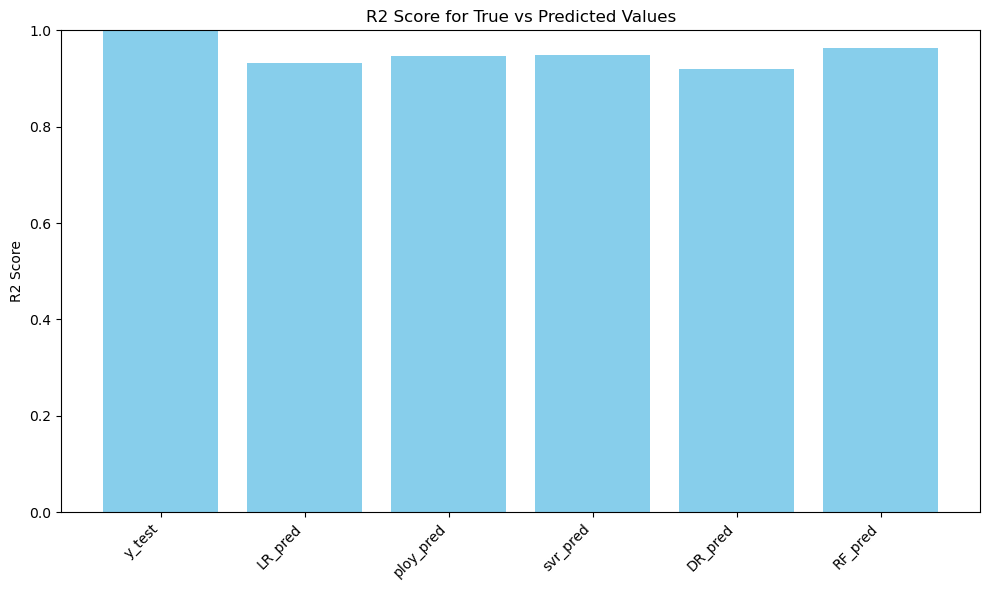

In [35]:
r2_scores = {'y_test': 1.0}  # R2 score for y_test is 1.0 by definition
for col in predictions_df.columns[1:]:
    r2_scores[col] = r2_score(predictions_df['y_test'], predictions_df[col])

# Plotting
plt.figure(figsize=(10, 6))

# Bar plot for R2 scores
plt.bar(r2_scores.keys(), r2_scores.values(), color='skyblue')

# Adding titles and labels
plt.title('R2 Score for True vs Predicted Values')
plt.ylabel('R2 Score')
plt.ylim(0, 1)  # Limit the y-axis from 0 to 1 for better visualization

# Show plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()